In [5]:
import cvxpy as cvx
import numpy as np
import gurobipy
import matplotlib.pyplot as plt

# Help Make HOTS


In [34]:
def Make_MSS_HotS(Stages, Initial_state, Gradient, Costs):
    
    """
    Stages = Int
    
    Initial_state = [Houses, Gatherers, Workers, Resources]
    Gradient      = [army/barracks, buildigs/worker, peasants/houses, supply/houses, resources/gatherer]
    Costs         = [crystal_costs, vespene_costs]
    costs         = [Archers, Barracks, Gatherers, Houses, Knights, Mages, Workers]
                   
    """
    
    # Resources
    Crystals               = cvx.Variable(Stages, name = 'Crystals', pos = True)
    Vespene                = cvx.Variable(Stages, name = 'Vespene', pos = True)
    Raw_Crystal_production = cvx.Variable(Stages, name = 'Raw Crystal Production', pos = True)
    Raw_Vespene_production = cvx.Variable(Stages, name = 'Raw Vespene Production', pos = True)
    
    # Peasants
    Workers    = cvx.Variable(Stages, name = 'Workers', pos = True)
    Gatherers  = cvx.Variable(Stages, name = 'Gatherers', pos = True)
    
    # Structures
    Houses     = cvx.Variable(Stages, name = 'Houses', pos = True)
    Barracks   = cvx.Variable(Stages, name = 'Barracks', pos = True)
    
    # Army
    Army       = cvx.Variable(Stages, name = 'Army', pos = True)
    Archers    = cvx.Variable(Stages, name = 'Archers', pos = True)
    Knights    = cvx.Variable(Stages, name = 'Knights', pos = True)
    Mages      = cvx.Variable(Stages, name = 'Mages', pos = True)
    
    A  = cvx.Variable(Stages-1, name = 'Archers Production')
    B  = cvx.Variable(Stages-1, name = 'Barracks Production')
    C  = cvx.Variable(Stages-1, name = 'Crystal Production')
    G  = cvx.Variable(Stages-1, name = 'Gatherers Production')
    H  = cvx.Variable(Stages-1, name = 'Houses Production')
    K  = cvx.Variable(Stages-1, name = 'Knights Production')
    M  = cvx.Variable(Stages-1, name = 'Mages Production')
    V  = cvx.Variable(Stages-1, name = 'Vespene Production')
    W  = cvx.Variable(Stages-1, name = 'Workers Production')
    
    initial_gatherers = cvx.Parameter()
    initial_houses    = cvx.Parameter()
    initial_workers   = cvx.Parameter()
    initial_crystals  = cvx.Parameter()
    initial_vespene   = cvx.Parameter()
    
    army_barracks      = cvx.Parameter()
    buildings_workers  = cvx.Parameter()
    peasants_houses    = cvx.Parameter()
    army_building      = cvx.Parameter()
    supplies_houses    = cvx.Parameter()
    resources_gatherer = cvx.Parameter()
    
    # Costs in Vespene
    custo_vespene_archers   = cvx.Parameter()
    custo_vespene_barracks  = cvx.Parameter()
    custo_vespene_gatherers = cvx.Parameter()
    custo_vespene_houses    = cvx.Parameter()
    custo_vespene_knights   = cvx.Parameter()
    custo_vespene_mages     = cvx.Parameter()
    custo_vespene_workers   = cvx.Parameter()

    # Costs in Crystals
    custo_crystal_archers   = cvx.Parameter()
    custo_crystal_barracks  = cvx.Parameter()
    custo_crystal_gatherers = cvx.Parameter()
    custo_crystal_houses    = cvx.Parameter()
    custo_crystal_knights   = cvx.Parameter()
    custo_crystal_mages     = cvx.Parameter()
    custo_crystal_workers   = cvx.Parameter()
    
    # Initial State
    initial_houses, initial_gatherers, initial_workers, initial_vespene, initial_crystals = Initial_state
    # Gradient
    army_barracks, buildings_workers, peasants_houses, supplies_houses, resources_gatherer  = Gradient
    # Costs
    crystal_costs, vespene_costs = Costs
    custo_vespene_archers, custo_vespene_barracks, custo_vespene_gatherers, custo_vespene_houses, custo_vespene_knights, custo_vespene_mages, custo_vespene_workers = vespene_costs
    custo_crystal_archers, custo_crystal_barracks, custo_crystal_gatherers, custo_crystal_houses, custo_crystal_knights, custo_crystal_mages, custo_crystal_workers = crystal_costs
    
    print('Initial Houses = ' + str(initial_houses))
    print('Initial Gatherers = ' + str(initial_gatherers))
    print('Initial Workers = ' + str(initial_workers))
    print('Initial Crystals = ' + str(initial_crystals))
    print('Initial Vespene = ' + str(initial_vespene) + '\n')
    
    print('Mages   Costs = ' + str(custo_crystal_mages) + ' Crystals and ' + str(custo_vespene_mages) + ' Vespene')
    print('Knights Costs = ' + str(custo_crystal_knights) + ' Crystals and ' + str(custo_vespene_knights) + ' Vespene')
    print('Archers Costs = ' + str(custo_crystal_archers) + ' Crystals and ' + str(custo_vespene_archers) + ' Vespene')
    
    Constraints = [Archers[0]   == 0,
                   Barracks[0]  == 0,
                   Gatherers[0] == initial_gatherers,
                   Houses[0]    == initial_houses,
                   Knights[0]   == 0,
                   Mages[0]     == 0,
                   Workers[0]   == initial_workers,
                   Army[0]      == 0,
                   Vespene[0]   == initial_vespene,
                   Crystals[0]  == initial_crystals,

                   A  >= 0,
                   B  >= 0,
                   G  >= 0,
                   H  >= 0,
                   K  >= 0,
                   M  >= 0,
                   W  >= 0]
    
    for i in range(Stages-1):

        Constraints.append(A[i] == Archers[i+1]   - Archers[i])
        Constraints.append(B[i] == Barracks[i+1]  - Barracks[i])
        Constraints.append(C[i] == Crystals[i+1]  - Crystals[i])
        Constraints.append(G[i] == Gatherers[i+1] - Gatherers[i])
        Constraints.append(H[i] == Houses[i+1]    - Houses[i])
        Constraints.append(K[i] == Knights[i+1]   - Knights[i]) 
        Constraints.append(M[i] == Mages[i+1]     - Mages[i])   
        Constraints.append(V[i] == Vespene[i+1]   - Vespene[i])
        Constraints.append(W[i] == Workers[i+1]   - Workers[i])

        Constraints.append(A[i]  + K[i] + M[i] <= army_barracks*Barracks[i])
        Constraints.append(B[i]  + H[i] <= buildings_workers*Workers[i])
        Constraints.append(G[i]  + W[i] <= peasants_houses*Houses[i])
        Constraints.append(Raw_Crystal_production[i] + 2*Raw_Vespene_production[i] == resources_gatherer*Gatherers[i])

        Constraints.append(Army[i+1] == Archers[i+1] + Knights[i+1] + Mages[i+1])
        Constraints.append(Army[i+1] 
                           + Gatherers[i+1] 
                           + Workers[i+1] <= Houses[i+1]*supplies_houses)

        Constraints.append(C[i] == Raw_Crystal_production[i]
                           - custo_crystal_archers*A[i] 
                           - custo_crystal_barracks*B[i]
                           - custo_crystal_gatherers*G[i]
                           - custo_crystal_houses*H[i]
                           - custo_crystal_knights*K[i]
                           - custo_crystal_mages*M[i]
                           - custo_crystal_workers*W[i])

        Constraints.append(V[i] == Raw_Vespene_production[i]
                           - custo_vespene_archers*A[i] 
                           - custo_vespene_knights*K[i]
                           - custo_vespene_mages*M[i])

        Constraints.append(Crystals[i]  >=  custo_crystal_archers*A[i] 
                           + custo_crystal_barracks*B[i]
                           + custo_crystal_gatherers*G[i]
                           + custo_crystal_houses*H[i]
                           + custo_crystal_knights*K[i]
                           + custo_crystal_mages*M[i]
                           + custo_crystal_workers*W[i])

        Constraints.append(Vespene[i]  >=  custo_vespene_archers*A[i]
                           + custo_vespene_knights*K[i]
                           + custo_vespene_mages*M[i])

        Constraints.append(Raw_Vespene_production[i] >= 0)
        Constraints.append(Raw_Crystal_production[i] >= 0)

    F_obj = cvx.Maximize(Army[-1])
    
    return cvx.Problem(F_obj, Constraints)

In [98]:
def MSS_WoL_plot(Stages, problem, save = False, Title = False, figname = False):

    Army, Archers, Barracks, Gatherers, Houses, Knights, Mages, Workers, Vespene,Crystals,*f, CrystalP, VespeneP, RCP, RVP = problem.variables()

################ Adjustments #########################################

    plt.figure(figsize=(12,8))
    plt.subplots_adjust(left=0.05, right=0.9, bottom = 0.4, top = 1.1,hspace = 0.4)
    
######################  First Plot  ##################################

    plt.subplot(231)
    plt.plot(Archers.value[:Stages] + Knights.value[:Stages] + Mages.value[:Stages],'r--*', label='Army')
    plt.plot(Gatherers.value[:Stages] + Workers.value[:Stages], label='Peasants')
    plt.plot(Crystals.value[:Stages] + Vespene.value[:Stages],'b--', label='Resources')
    plt.plot(Barracks.value[:Stages] + Houses.value[:Stages], label='Buildings')
    if Title:
        plt.title(Title)
    else:
        pass
    plt.grid(True)
    plt.legend()
    
######################  Second Plot  ##################################

    plt.subplot(232)
    
    plt.plot(Gatherers.value[:Stages], label='Gatherers')
    plt.plot(Workers.value[:Stages], label='Builders')
    plt.plot(Houses.value[:Stages], label='Houses')
    if Title:
        plt.title(Title)
    else:
        plt.title(str(Stages-1) + ' Estágios')
    plt.grid(True)
    plt.legend()


######################  Third Plot  ##################################

    plt.subplot(233)
    plt.plot(Crystals.value[:Stages], label='Crystals')
    plt.plot(Vespene.value[:Stages],'g--*', label='Vespene')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    
    
######################  Fourth Plot  ##################################

    plt.subplot(234)
    
    plt.plot(Archers.value[:Stages] + Knights.value[:Stages] + Mages.value[:Stages],'r--*', label='Army')
    plt.plot(Gatherers.value[:Stages] + Workers.value[:Stages], label='Peasants')
    plt.plot(Crystals.value[:Stages] + Vespene.value[:Stages],'b--', label='Resources')
    plt.plot(Barracks.value[:Stages] + Houses.value[:Stages], label='Buildings')

    plt.xlabel('Stages')
    plt.grid(True)
    plt.yscale('symlog')

    plt.legend()
    
    
######################  Fith Plot  ##################################

    plt.subplot(235)

    plt.plot(Barracks.value[:Stages], label='Barracks')
    plt.plot(Houses.value[:Stages], label='Houses')

    plt.xlabel('Stages')
    plt.grid(True)
    #plt.yscale('symlog')
    plt.legend()
    
        
######################  Sixth Plot  ##################################

    plt.subplot(236)

    plt.plot(Archers.value[:Stages],'--*', label=Archers.name())
    plt.plot(Knights.value[:Stages],'o--', label=Knights.name())
    plt.plot(Mages.value[:Stages],'--', label=Mages.name())
    plt.plot(Barracks.value[:Stages], label = Barracks.name())
    plt.legend()
    plt.xlabel('Stages')
    #plt.yscale('symlog')
    plt.grid(True)    

    
#####################################################################

    if save:
        if figname:
            
            plt.savefig(figname, bbox_inches = 'tight',pad_inches = 0)
        else:
            mnum = np.random.rand() + 10*sum(initial_state)
            plt.savefig(str(Stages)+'_Estagios_'+str(mnum), bbox_inches = 'tight', pad_inches = 0)

In [194]:
stages        = 31
initial_cond  = [2,1,0,0,0]
productions   = [1,1,1,2,3]
costs_c       = [4,0,6,0,3,6,12]
costs_v       = [3, 5, 0, 3,5,2,0] # Archer, Knights and Mages

In [195]:
problem = Make_MSS_HotS(Stages = stages, Initial_state = initial_cond, Gradient = productions ,Costs = [costs_c, costs_v])

Initial Houses = 2
Initial Gatherers = 1
Initial Workers = 0
Initial Crystals = 0
Initial Vespene = 0

Mages   Costs = 6 Crystals and 2 Vespene
Knights Costs = 3 Crystals and 5 Vespene
Archers Costs = 4 Crystals and 3 Vespene


In [196]:
%time problem.solve(solver='GUROBI')

Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored
Wall time: 1.07 s


652.0698679315478

In [197]:
for v in problem.variables():
    print(v)

Army
Archers
Barracks
Gatherers
Houses
Knights
Mages
Workers
Vespene
Crystals
Archers Production
Barracks Production
Gatherers Production
Houses Production
Knights Production
Mages Production
Workers Production
Crystal Production
Vespene Production
Raw Crystal Production
Raw Vespene Production


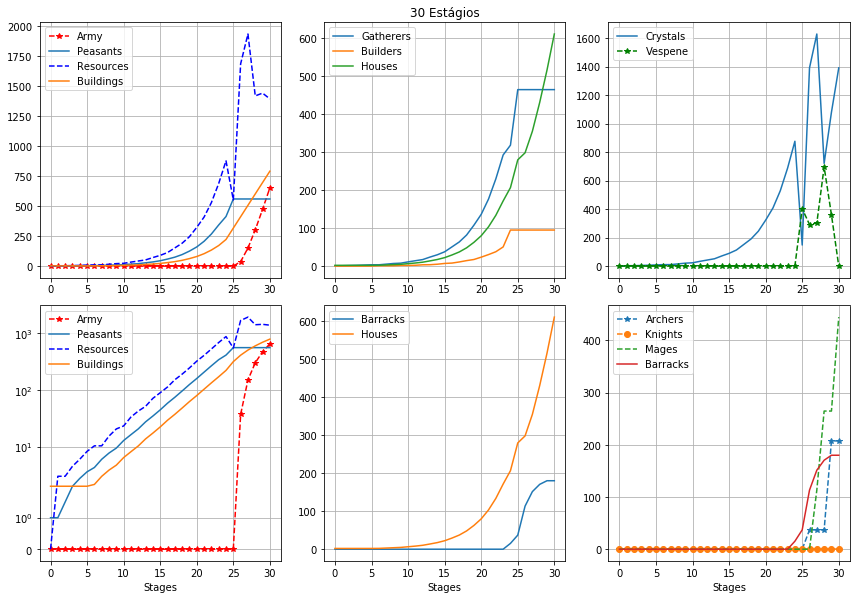

In [198]:
MSS_WoL_plot(stages, problem, save = True, figname='real30')

In [92]:
def Simulated_Battle(Army, Enemy):
    return

In [62]:
problem.variables()[0].name(),problem.variables()[0].value

('Army', None)

In [18]:
for i in problem.variables():
    print(i)

Army
Archers
Barracks
Gatherers
Houses
Knights
Mages
Workers
Vespene
Crystals
Enemy
Archers Production
Barracks Production
Gatherers Production
Houses Production
Knights Production
Mages Production
Workers Production
Crystal Production
Vespene Production
Raw Crystal Production
Raw Vespene Production


### INTEGER PROBLEM AHEAD PLS BE CAUTIOUS


In [119]:
def Make_IMSS_HotS(Stages, Initial_state, Gradient, Costs):
    
    """
    Stages = Int
    
    Initial_state = [Houses, Gatherers, Workers, Resources]
    Gradient      = [army/barracks, buildigs/worker, peasants/houses, supply/houses, resources/gatherer]
    Costs         = [vespene_costs, crystal_costs]
    costs         = [Archers, Barracks, Gatherers, Houses, Knights, Mages, Workers]
                   
    """
    
    # Resources
    Crystals               = cvx.Variable(Stages, name = 'Crystals', integer = True)
    Vespene                = cvx.Variable(Stages, name = 'Vespene', integer = True)
    Raw_Crystal_production = cvx.Variable(Stages, name = 'Raw Crystal Production', integer = True)
    Raw_Vespene_production = cvx.Variable(Stages, name = 'Raw Vespene Production', integer = True)
    
    # Peasants
    Workers    = cvx.Variable(Stages, name = 'Workers',integer = True)
    Gatherers  = cvx.Variable(Stages, name = 'Gatherers',  integer = True)
    
    # Structures
    Houses     = cvx.Variable(Stages, name = 'Houses',  integer = True)
    Barracks   = cvx.Variable(Stages, name = 'Barracks',  integer = True)
    
    # Army
    Army       = cvx.Variable(Stages, name = 'Army', integer = True)
    Archers    = cvx.Variable(Stages, name = 'Archers', integer = True)
    Knights    = cvx.Variable(Stages, name = 'Knights', integer = True)
    Mages      = cvx.Variable(Stages, name = 'Mages', integer = True)

    
    A  = cvx.Variable(Stages-1, name = 'Archers Production')
    B  = cvx.Variable(Stages-1, name = 'Barracks Production')
    C  = cvx.Variable(Stages-1, name = 'Crystal Production')
    G  = cvx.Variable(Stages-1, name = 'Gatherers Production')
    H  = cvx.Variable(Stages-1, name = 'Houses Production')
    K  = cvx.Variable(Stages-1, name = 'Knights Production')
    M  = cvx.Variable(Stages-1, name = 'Mages Production')
    V  = cvx.Variable(Stages-1, name = 'Vespene Production')
    W  = cvx.Variable(Stages-1, name = 'Workers Production')
    
    initial_gatherers = cvx.Parameter()
    initial_houses    = cvx.Parameter()
    initial_workers   = cvx.Parameter()
    initial_crystals  = cvx.Parameter()
    initial_vespene   = cvx.Parameter()
    
    army_barracks      = cvx.Parameter()
    buildings_workers  = cvx.Parameter()
    peasants_houses    = cvx.Parameter()
    army_building      = cvx.Parameter()
    supplies_houses    = cvx.Parameter()
    resources_gatherer = cvx.Parameter()
    
    # Costs in Vespene
    custo_vespene_archers   = cvx.Parameter()
    custo_vespene_barracks  = cvx.Parameter()
    custo_vespene_gatherers = cvx.Parameter()
    custo_vespene_houses    = cvx.Parameter()
    custo_vespene_knights   = cvx.Parameter()
    custo_vespene_mages     = cvx.Parameter()
    custo_vespene_workers   = cvx.Parameter()

    # Costs in Crystals
    custo_crystal_archers   = cvx.Parameter()
    custo_crystal_barracks  = cvx.Parameter()
    custo_crystal_gatherers = cvx.Parameter()
    custo_crystal_houses    = cvx.Parameter()
    custo_crystal_knights   = cvx.Parameter()
    custo_crystal_mages     = cvx.Parameter()
    custo_crystal_workers   = cvx.Parameter()
    
    # Initial State
    initial_houses, initial_gatherers, initial_workers, initial_vespene, initial_crystals = Initial_state
    # Gradient
    army_barracks, buildings_workers, peasants_houses, supplies_houses, resources_gatherer  = Gradient
    # Costs
    crystal_costs, vespene_costs = Costs
    custo_vespene_archers, custo_vespene_barracks, custo_vespene_gatherers, custo_vespene_houses, custo_vespene_knights, custo_vespene_mages, custo_vespene_workers = vespene_costs
    custo_crystal_archers, custo_crystal_barracks, custo_crystal_gatherers, custo_crystal_houses, custo_crystal_knights, custo_crystal_mages, custo_crystal_workers = crystal_costs
    
    print('Initial Houses = ' + str(initial_houses))
    print('Initial Gatherers = ' + str(initial_gatherers))
    print('Initial Workers = ' + str(initial_workers))
    print('Initial Crystals = ' + str(initial_crystals))
    print('Initial Vespene = ' + str(initial_vespene) + '\n')
    
    print('Mages   Costs = ' + str(custo_crystal_mages) + ' Crystals and ' + str(custo_vespene_mages) + ' Vespene')
    print('Knights Costs = ' + str(custo_crystal_knights) + ' Crystals and ' + str(custo_vespene_knights) + ' Vespene')
    print('Archers Costs = ' + str(custo_crystal_archers) + ' Crystals and ' + str(custo_vespene_archers) + ' Vespene')
    
    Constraints = [Archers[0]   == 0,
                   Barracks[0]  == 0,
                   Gatherers[0] == initial_gatherers,
                   Houses[0]    == initial_houses,
                   Knights[0]   == 0,
                   Mages[0]     == 0,
                   Workers[0]   == initial_workers,
                   Army[0]      == 0,
                   Vespene[0]   == initial_vespene,
                   Crystals[0]  == initial_crystals,
                   
                   A  >= 0,
                   B  >= 0,
                   G  >= 0,
                   H  >= 0,
                   K  >= 0,
                   M  >= 0,
                   W  >= 0]

    for i in range(Stages-1):

        Constraints.append(A[i] == Archers[i+1]   - Archers[i])
        Constraints.append(B[i] == Barracks[i+1]  - Barracks[i])
        Constraints.append(C[i] == Crystals[i+1]  - Crystals[i])
        Constraints.append(G[i] == Gatherers[i+1] - Gatherers[i])
        Constraints.append(H[i] == Houses[i+1]    - Houses[i])
        Constraints.append(K[i] == Knights[i+1]   - Knights[i])
        Constraints.append(M[i] == Mages[i+1]     - Mages[i])
        Constraints.append(V[i] == Vespene[i+1]   - Vespene[i])
        Constraints.append(W[i] == Workers[i+1]   - Workers[i])

        Constraints.append(A[i]  + K[i] + M[i] <= army_barracks*Barracks[i])
        Constraints.append(B[i]  + H[i] <= buildings_workers*Workers[i])
        Constraints.append(G[i]  + W[i] <= peasants_houses*Houses[i])
        Constraints.append(Raw_Crystal_production[i] + 2*Raw_Vespene_production[i] == resources_gatherer*Gatherers[i])

        Constraints.append(Army[i+1] == Archers[i+1] + Knights[i+1] + Mages[i+1])
        Constraints.append(Army[i+1] 
                           + Gatherers[i+1] 
                           + Workers[i+1] <= Houses[i+1]*supplies_houses)

        Constraints.append(C[i] == Raw_Crystal_production[i]
                           - custo_crystal_archers*A[i] 
                           - custo_crystal_barracks*B[i]
                           - custo_crystal_gatherers*G[i]
                           - custo_crystal_houses*H[i]
                           - custo_crystal_knights*K[i]
                           - custo_crystal_mages*M[i]
                           - custo_crystal_workers*W[i])

        Constraints.append(V[i] == Raw_Vespene_production[i]
                           - custo_vespene_archers*A[i] 
                           - custo_vespene_knights*K[i]
                           - custo_vespene_mages*M[i])

        Constraints.append(Crystals[i]  >=  custo_crystal_archers*A[i] 
                           + custo_crystal_barracks*B[i]
                           + custo_crystal_gatherers*G[i]
                           + custo_crystal_houses*H[i]
                           + custo_crystal_knights*K[i]
                           + custo_crystal_mages*M[i]
                           + custo_crystal_workers*W[i])

        Constraints.append(Vespene[i]  >=  custo_vespene_archers*A[i]
                           + custo_vespene_knights*K[i]
                           + custo_vespene_mages*M[i])

        Constraints.append(Raw_Vespene_production[i] >= 0)
        Constraints.append(Raw_Crystal_production[i] >= 0)

    F_obj = cvx.Maximize(Army[-1])
    
    return cvx.Problem(F_obj, Constraints)

In [139]:
stages        = 10
initial_cond  = [2,1,0,0,0]
productions   = [1,1,1,2,3]
costs_c       = [4,0,6,0,3,6,12]
costs_v       = [3, 5, 0, 3,5,2,0] # Archer, Knights and Mages

In [140]:
int_problem = Make_IMSS_HotS(stages, initial_cond, productions, Costs = [costs_c, costs_v])

Initial Houses = 2
Initial Gatherers = 1
Initial Workers = 0
Initial Crystals = 0
Initial Vespene = 0

Mages   Costs = 6 Crystals and 2 Vespene
Knights Costs = 3 Crystals and 5 Vespene
Archers Costs = 4 Crystals and 3 Vespene


In [141]:
%time int_problem.solve(solver='GUROBI')

Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored
Wall time: 1.26 s


509.0

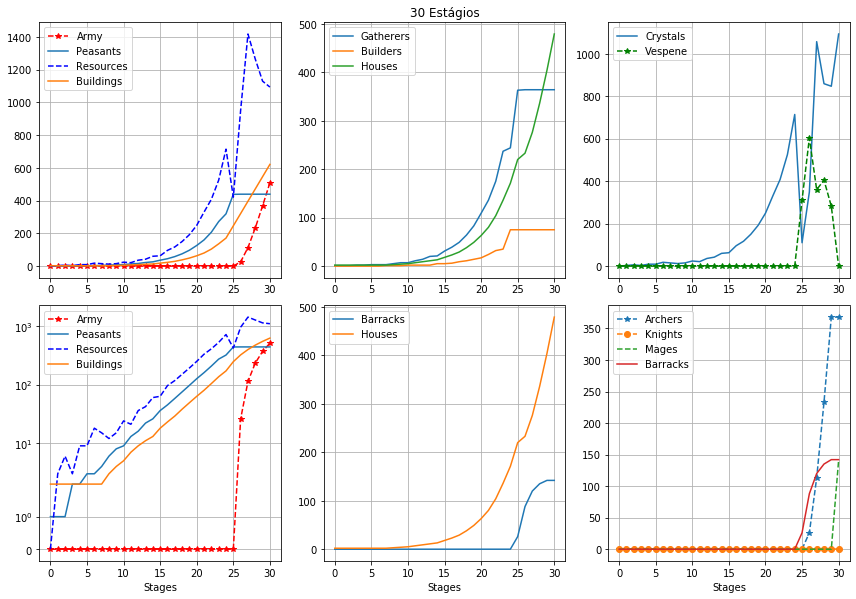

In [142]:
MSS_WoL_plot(stages, int_problem, save=True, figname='integer30')

### AQUI É ALGO TOP

In [145]:
def Make_IMSS_HotS2(Stages, Initial_state, Gradient, Costs):
    
    """
    Stages = Int
    
    Initial_state = [Houses, Gatherers, Workers, Resources]
    Gradient      = [army/barracks, buildigs/worker, peasants/houses, supply/houses, resources/gatherer]
    Costs         = [vespene_costs, crystal_costs]
    costs         = [Archers, Barracks, Gatherers, Houses, Knights, Mages, Workers]
                   
    """
    
    # Resources
    Crystals               = cvx.Variable(Stages, name = 'Crystals', integer = True)
    Vespene                = cvx.Variable(Stages, name = 'Vespene', integer = True)
    Raw_Crystal_production = cvx.Variable(Stages, name = 'Raw Crystal Production', integer = True)
    Raw_Vespene_production = cvx.Variable(Stages, name = 'Raw Vespene Production', integer = True)
    
    # Peasants
    Workers    = cvx.Variable(Stages, name = 'Workers',integer = True)
    Gatherers  = cvx.Variable(Stages, name = 'Gatherers',  integer = True)
    
    # Structures
    Houses     = cvx.Variable(Stages, name = 'Houses',  integer = True)
    Barracks   = cvx.Variable(Stages, name = 'Barracks',  integer = True)
    
    # Army
    Army       = cvx.Variable(Stages, name = 'Army', integer = True)
    Archers    = cvx.Variable(Stages, name = 'Archers', integer = True)
    Knights    = cvx.Variable(Stages, name = 'Knights', integer = True)
    Mages      = cvx.Variable(Stages, name = 'Mages', integer = True)

    
    A  = cvx.Variable(Stages-1, name = 'Archers Production')
    B  = cvx.Variable(Stages-1, name = 'Barracks Production')
    C  = cvx.Variable(Stages-1, name = 'Crystal Production')
    G  = cvx.Variable(Stages-1, name = 'Gatherers Production')
    H  = cvx.Variable(Stages-1, name = 'Houses Production')
    K  = cvx.Variable(Stages-1, name = 'Knights Production')
    M  = cvx.Variable(Stages-1, name = 'Mages Production')
    V  = cvx.Variable(Stages-1, name = 'Vespene Production')
    W  = cvx.Variable(Stages-1, name = 'Workers Production')
    
    initial_gatherers = cvx.Parameter()
    initial_houses    = cvx.Parameter()
    initial_workers   = cvx.Parameter()
    initial_crystals  = cvx.Parameter()
    initial_vespene   = cvx.Parameter()
    
    army_barracks      = cvx.Parameter()
    buildings_workers  = cvx.Parameter()
    peasants_houses    = cvx.Parameter()
    army_building      = cvx.Parameter()
    supplies_houses    = cvx.Parameter()
    resources_gatherer = cvx.Parameter()
    
    # Costs in Vespene
    custo_vespene_archers   = cvx.Parameter()
    custo_vespene_barracks  = cvx.Parameter()
    custo_vespene_gatherers = cvx.Parameter()
    custo_vespene_houses    = cvx.Parameter()
    custo_vespene_knights   = cvx.Parameter()
    custo_vespene_mages     = cvx.Parameter()
    custo_vespene_workers   = cvx.Parameter()

    # Costs in Crystals
    custo_crystal_archers   = cvx.Parameter()
    custo_crystal_barracks  = cvx.Parameter()
    custo_crystal_gatherers = cvx.Parameter()
    custo_crystal_houses    = cvx.Parameter()
    custo_crystal_knights   = cvx.Parameter()
    custo_crystal_mages     = cvx.Parameter()
    custo_crystal_workers   = cvx.Parameter()
    
    # Initial State
    initial_houses, initial_gatherers, initial_workers, initial_vespene, initial_crystals = Initial_state
    # Gradient
    army_barracks, buildings_workers, peasants_houses, supplies_houses, resources_gatherer  = Gradient
    # Costs
    crystal_costs, vespene_costs = Costs
    custo_vespene_archers, custo_vespene_barracks, custo_vespene_gatherers, custo_vespene_houses, custo_vespene_knights, custo_vespene_mages, custo_vespene_workers = vespene_costs
    custo_crystal_archers, custo_crystal_barracks, custo_crystal_gatherers, custo_crystal_houses, custo_crystal_knights, custo_crystal_mages, custo_crystal_workers = crystal_costs
    
    print('Initial Houses = ' + str(initial_houses))
    print('Initial Gatherers = ' + str(initial_gatherers))
    print('Initial Workers = ' + str(initial_workers))
    print('Initial Crystals = ' + str(initial_crystals))
    print('Initial Vespene = ' + str(initial_vespene) + '\n')
    
    print('Mages   Costs = ' + str(custo_crystal_mages) + ' Crystals and ' + str(custo_vespene_mages) + ' Vespene')
    print('Knights Costs = ' + str(custo_crystal_knights) + ' Crystals and ' + str(custo_vespene_knights) + ' Vespene')
    print('Archers Costs = ' + str(custo_crystal_archers) + ' Crystals and ' + str(custo_vespene_archers) + ' Vespene')
    
    Constraints = [Archers[0]   == 0,
                   Barracks[0]  == 0,
                   Gatherers[0] == initial_gatherers,
                   Houses[0]    == initial_houses,
                   Knights[0]   == 0,
                   Mages[0]     == 0,
                   Workers[0]   == initial_workers,
                   Army[0]      == 0,
                   Vespene[0]   == initial_vespene,
                   Crystals[0]  == initial_crystals,
                   
                   A  >= 0,
                   B  >= 0,
                   G  >= 0,
                   H  >= 0,
                   K  >= 0,
                   M  >= 0,
                   W  >= 0]

    for i in range(Stages-1):

        Constraints.append(A[i] == Archers[i+1]   - Archers[i])
        Constraints.append(B[i] == Barracks[i+1]  - Barracks[i])
        Constraints.append(C[i] == Crystals[i+1]  - Crystals[i])
        Constraints.append(G[i] == Gatherers[i+1] - Gatherers[i])
        Constraints.append(H[i] == Houses[i+1]    - Houses[i])
        Constraints.append(K[i] == Knights[i+1]   - Knights[i])
        Constraints.append(M[i] == Mages[i+1]     - Mages[i])
        Constraints.append(V[i] == Vespene[i+1]   - Vespene[i])
        Constraints.append(W[i] == Workers[i+1]   - Workers[i])

        Constraints.append(A[i]  + K[i] + M[i] <= army_barracks*Barracks[i])
        Constraints.append(B[i]  + H[i] <= buildings_workers*Workers[i])
        Constraints.append(G[i]  + W[i] <= peasants_houses*Houses[i])
        Constraints.append(Raw_Crystal_production[i] + 2*Raw_Vespene_production[i] == resources_gatherer*Gatherers[i])

        Constraints.append(Army[i+1] == Archers[i+1] + Knights[i+1] + Mages[i+1])
        Constraints.append(Army[i+1] 
                           + Gatherers[i+1] 
                           + Workers[i+1] <= Houses[i+1]*supplies_houses)

        Constraints.append(C[i] == Raw_Crystal_production[i]
                           - custo_crystal_archers*A[i] 
                           - custo_crystal_barracks*B[i]
                           - custo_crystal_gatherers*G[i]
                           - custo_crystal_houses*H[i]
                           - custo_crystal_knights*K[i]
                           - custo_crystal_mages*M[i]
                           - custo_crystal_workers*W[i])

        Constraints.append(V[i] == Raw_Vespene_production[i]
                           - custo_vespene_archers*A[i] 
                           - custo_vespene_knights*K[i]
                           - custo_vespene_mages*M[i])

        Constraints.append(Crystals[i]  >=  custo_crystal_archers*A[i] 
                           + custo_crystal_barracks*B[i]
                           + custo_crystal_gatherers*G[i]
                           + custo_crystal_houses*H[i]
                           + custo_crystal_knights*K[i]
                           + custo_crystal_mages*M[i]
                           + custo_crystal_workers*W[i])

        Constraints.append(Vespene[i]  >=  custo_vespene_archers*A[i]
                           + custo_vespene_knights*K[i]
                           + custo_vespene_mages*M[i])

        Constraints.append(Raw_Vespene_production[i] >= 0)
        Constraints.append(Raw_Crystal_production[i] >= 0)

    F_obj = cvx.Maximize(Gatherers[-1])
    
    return cvx.Problem(F_obj, Constraints)

In [157]:
stages        = 11
initial_cond  = [2,1,0,0,0]
productions   = [1,1,1,2,3]
costs_c       = [4,0,6,0,3,6,12]
costs_v       = [3, 5, 0, 3,5,2,0] # Archer, Knights and Mages

In [158]:
int_problem2 = Make_IMSS_HotS2(stages, initial_cond, productions, Costs = [costs_c, costs_v])

Initial Houses = 2
Initial Gatherers = 1
Initial Workers = 0
Initial Crystals = 0
Initial Vespene = 0

Mages   Costs = 6 Crystals and 2 Vespene
Knights Costs = 3 Crystals and 5 Vespene
Archers Costs = 4 Crystals and 3 Vespene


In [180]:
for v in int_problem2.variables():
    print(v)

Gatherers
Archers
Barracks
Houses
Knights
Mages
Workers
Army
Vespene
Crystals
Archers Production
Barracks Production
Gatherers Production
Houses Production
Knights Production
Mages Production
Workers Production
Crystal Production
Vespene Production
Raw Crystal Production
Raw Vespene Production


In [183]:
def MSS_WoL_plot2(Stages, problem, save = False, Title = False, figname = False):

    Gatherers, Archers, Barracks, Houses, Knights, Mages, Workers, Army ,Vespene, Crystals,*f, CrystalP, VespeneP, RCP, RVP = problem.variables()

################ Adjustments #########################################

    plt.figure(figsize=(12,8))
    plt.subplots_adjust(left=0.05, right=0.9, bottom = 0.4, top = 1.1,hspace = 0.4)
    
######################  First Plot  ##################################

    plt.subplot(231)
    plt.plot(Archers.value[:Stages] + Knights.value[:Stages] + Mages.value[:Stages],'r--*', label='Army')
    plt.plot(Gatherers.value[:Stages] + Workers.value[:Stages], label='Peasants')
    plt.plot(Crystals.value[:Stages] + Vespene.value[:Stages],'b--', label='Resources')
    plt.plot(Barracks.value[:Stages] + Houses.value[:Stages], label='Buildings')
    if Title:
        plt.title(Title)
    else:
        pass
    plt.grid(True)
    plt.legend()
    
######################  Second Plot  ##################################

    plt.subplot(232)
    
    plt.plot(Gatherers.value[:Stages], label='Gatherers')
    plt.plot(Workers.value[:Stages], label='Builders')
    plt.plot(Houses.value[:Stages], label='Houses')
    if Title:
        plt.title(Title)
    else:
        plt.title(str(Stages-1) + ' Estágios')
    plt.grid(True)
    plt.legend()


######################  Third Plot  ##################################

    plt.subplot(233)
    plt.plot(Crystals.value[:Stages], label=Crystals.name())
    plt.plot(Vespene.value[:Stages],'g--*', label=Vespene.name())
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    
    
######################  Fourth Plot  ##################################

    plt.subplot(234)
    
    plt.plot(Archers.value[:Stages] + Knights.value[:Stages] + Mages.value[:Stages],'r--*', label='Army')
    plt.plot(Gatherers.value[:Stages] + Workers.value[:Stages], label='Peasants')
    plt.plot(Crystals.value[:Stages] + Vespene.value[:Stages],'b--', label='Resources')
    plt.plot(Barracks.value[:Stages] + Houses.value[:Stages], label='Buildings')

    plt.xlabel('Stages')
    plt.grid(True)
    plt.yscale('symlog')

    plt.legend()
    
    
######################  Fith Plot  ##################################

    plt.subplot(235)

    plt.plot(Barracks.value[:Stages], label='Barracks')
    plt.plot(Houses.value[:Stages], label='Houses')

    plt.xlabel('Stages')
    plt.grid(True)
    #plt.yscale('symlog')
    plt.legend()
    
        
######################  Sixth Plot  ##################################

    plt.subplot(236)

    plt.plot(Archers.value[:Stages],'--*', label=Archers.name())
    plt.plot(Knights.value[:Stages],'o--', label=Knights.name())
    plt.plot(Mages.value[:Stages],'--', label=Mages.name())
    plt.plot(Barracks.value[:Stages], label = Barracks.name())
    plt.legend()
    plt.xlabel('Stages')
    #plt.yscale('symlog')
    plt.grid(True)    

    
#####################################################################

    if save:
        if figname:
            
            plt.savefig(figname, bbox_inches = 'tight',pad_inches = 0)
        else:
            mnum = np.random.rand() + 10*sum(initial_state)
            plt.savefig(str(Stages)+'_Estagios_'+str(mnum), bbox_inches = 'tight', pad_inches = 0)

In [184]:
%time int_problem2.solve(solver='GUROBI')

Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored
Wall time: 198 ms


9.0

In [185]:
int_problem2.variables()[9].name(),int_problem2.variables()[9].value

('Crystals', array([-0.,  3.,  6.,  3.,  9.,  9., 18., 15., 12., 27., 18.]))

In [186]:
int_problem2.variables()[8].name(),int_problem2.variables()[8].value

('Vespene', array([-0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]))

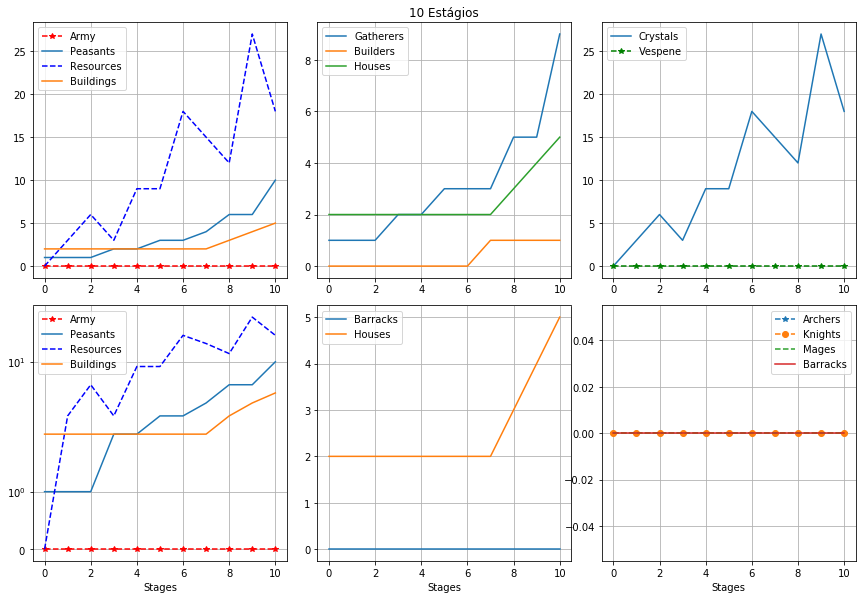

In [188]:
MSS_WoL_plot2(stages, int_problem2, save=True, figname='int10sss')

In [228]:
for v in int_problem2.variables():
    print(v, v.value[-1])

Gatherers 9.0
Archers 0.0
Barracks 0.0
Houses 5.0
Knights 0.0
Mages 0.0
Workers 1.0
Army 0.0
Vespene 0.0
Crystals 18.0
Archers Production 0.0
Barracks Production 0.0
Gatherers Production 4.0
Houses Production 1.0
Knights Production 0.0
Mages Production 0.0
Workers Production 0.0
Crystal Production -9.0
Vespene Production 0.0
Raw Crystal Production 0.0
Raw Vespene Production 0.0


In [244]:
stages        = 21
initial_cond  = [5,9,1,0,9]
productions   = [1,1,1,2,3]
costs_c       = [4,0,6,0,3,6,12]
costs_v       = [3, 5, 0, 3,5,2,0] # Archer, Knights and Mages

In [192]:
problem3 = Make_MSS_HotS(stages, initial_cond, productions, Costs = [costs_c, costs_v])

Initial Houses = 5
Initial Gatherers = 9
Initial Workers = 1
Initial Crystals = 9
Initial Vespene = 0

Mages   Costs = 6 Crystals and 2 Vespene
Knights Costs = 3 Crystals and 5 Vespene
Archers Costs = 4 Crystals and 3 Vespene


In [193]:
%time problem3.solve(solver='GUROBI')

Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored
Wall time: 860 ms


461.70474837662334

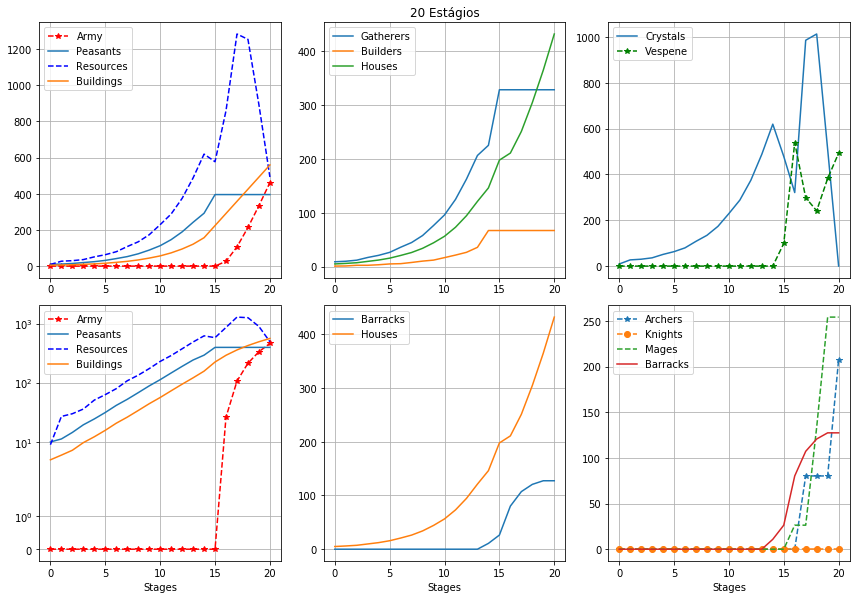

In [245]:
MSS_WoL_plot(stages, problem3, save = True, figname='cont20')

In [241]:
def MSS_WoL_plot3(Stages, problem_int, problem_con, save = False, Title = False, figname = False):

    Gatherers, Archers, Barracks, Houses, Knights, Mages, Workers, Army ,Vespene, Crystals,*f, CrystalP, VespeneP, RCP, RVP = problem_int.variables()
    Army1, Archers1, Barracks1, Gatherers1, Houses1, Knights1, Mages1, Workers1, Vespene1,Crystals1,*f, CrystalP, VespeneP, RCP1, RVP1 = problem_con.variables()

    Gatherers=list(Gatherers.value)+list(Gatherers1.value)
    Archers=list(Archers.value)+list(Archers1.value)
    Barracks=list(Barracks.value)+list(Barracks1.value)
    Houses=list(Houses.value)+list(Houses1.value)
    Knights=list(Knights.value)+list(Knights1.value)
    Mages=list(Mages.value)+list(Mages1.value)
    Workers=list(Workers.value)+list(Workers1.value)
    Army=list(Army.value)+list(Army1.value)
    Vespene=list(Vespene.value)+list(Vespene1.value)
    Crystals=list(Crystals.value)+list(Crystals1.value)
    
################ Adjustments #########################################

    plt.figure(figsize=(12,8))
    plt.subplots_adjust(left=0.05, right=0.9, bottom = 0.4, top = 1.1,hspace = 0.4)
    
######################  First Plot  ##################################

    plt.subplot(231)
    plt.plot(np.array(Archers[:Stages]) + np.array(Knights[:Stages]) + np.array(Mages[:Stages]),'r--*', label='Army')
    plt.plot(np.array(Gatherers[:Stages]) + np.array(Workers[:Stages]), label='Peasants')
    plt.plot(np.array(Crystals[:Stages]) + np.array(Vespene[:Stages]),'b--', label='Resources')
    plt.plot(np.array(Barracks[:Stages]) + np.array(Houses[:Stages]), label='Buildings')
    if Title:
        plt.title(Title)
    else:
        pass
    plt.grid(True)
    plt.legend()
    
######################  Second Plot  ##################################

    plt.subplot(232)
    
    plt.plot(Gatherers[:Stages], label='Gatherers')
    plt.plot(Workers[:Stages], label='Builders')
    plt.plot(Houses[:Stages], label='Houses')
    if Title:
        plt.title(Title)
    else:
        plt.title(str(Stages-2) + ' Estágios')
    plt.grid(True)
    plt.legend()


######################  Third Plot  ##################################

    plt.subplot(233)
    plt.plot(Crystals[:Stages], label='Crystals')
    plt.plot(Vespene[:Stages],'g--*', label='Vespene')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    
    
######################  Fourth Plot  ##################################

    plt.subplot(234)
    
    plt.plot(np.array(Archers[:Stages]) + np.array(Knights[:Stages]) + np.array(Mages[:Stages]),'r--*', label='Army')
    plt.plot(np.array(Gatherers[:Stages]) + np.array(Workers[:Stages]), label='Peasants')
    plt.plot(np.array(Crystals[:Stages]) + np.array(Vespene[:Stages]),'b--', label='Resources')
    plt.plot(np.array(Barracks[:Stages]) +np.array(Houses[:Stages]), label='Buildings')

    plt.xlabel('Stages')
    plt.grid(True)
    plt.yscale('symlog')

    plt.legend()
    
    
######################  Fith Plot  ##################################

    plt.subplot(235)

    plt.plot(Barracks[:Stages], label='Barracks')
    plt.plot(Houses[:Stages], label='Houses')

    plt.xlabel('Stages')
    plt.grid(True)
    #plt.yscale('symlog')
    plt.legend()
    
        
######################  Sixth Plot  ##################################

    plt.subplot(236)

    plt.plot(Archers[:Stages],'--*', label='Archers')
    plt.plot(Knights[:Stages],'o--', label='Knights')
    plt.plot(Mages[:Stages],'--', label='Mages')
    plt.plot(Barracks[:Stages], label =' Barracks')
    plt.legend()
    plt.xlabel('Stages')
    #plt.yscale('symlog')
    plt.grid(True)    

    
#####################################################################

    if save:
        if figname:
            
            plt.savefig(figname, bbox_inches = 'tight',pad_inches = 0)
        else:
            mnum = np.random.rand() + 10*sum(initial_state)
            plt.savefig(str(Stages)+'_Estagios_'+str(mnum), bbox_inches = 'tight', pad_inches = 0)

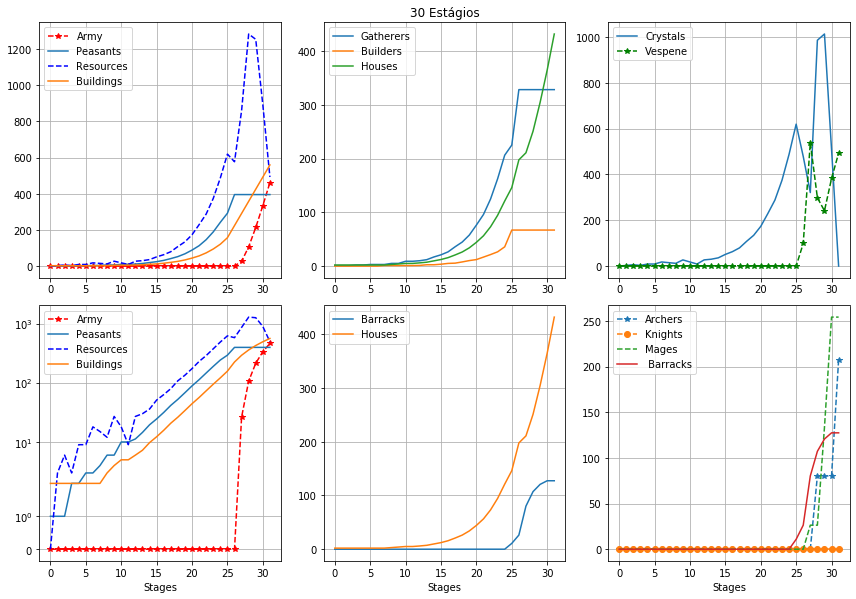

In [243]:
MSS_WoL_plot3(32, int_problem2, problem3, save = True, figname='Mixed_30')

# Aqui é o problema misto done right


In [99]:
def make_something(Stages, Initial_state, Gradient, Costs):
    
    """
    Stages = Int
    
    Initial_state = [Houses, Gatherers, Workers, Resources]
    Gradient      = [army/barracks, buildigs/worker, peasants/houses, supply/houses, resources/gatherer]
    Costs         = [vespene_costs, crystal_costs]
    costs         = [Archers, Barracks, Gatherers, Houses, Knights, Mages, Workers]
                   
    """
    
    # Resources
    Crystals10             = cvx.Variable(12, name = 'Crystals', integer = True)
    Crystals20             = cvx.Variable(Stages-12, name = 'Crystals', pos = True)
    Crystals               = cvx.hstack([Crystals10, Crystals20])
    
    Vespene10                = cvx.Variable(12, name = 'Vespene', integer = True)
    Vespene20                = cvx.Variable(Stages-12, name = 'Vespene', pos = True)
    Vespene                  = cvx.hstack([Vespene10, Vespene20])
    
    Raw_Crystal_production10                = cvx.Variable(12, name = 'Raw Crystal Production', integer = True)
    Raw_Crystal_production20                = cvx.Variable(Stages-12, name = 'Raw Crystal Production', pos = True)
    Raw_Crystal_production                  = cvx.hstack([Raw_Crystal_production10, Raw_Crystal_production20])
    
    Raw_Vespene_production10 = cvx.Variable(12, name = 'Raw Vespene Production', integer = True)
    Raw_Vespene_production20                = cvx.Variable(Stages-12, name = 'Raw Vespene Production', pos = True)
    Raw_Vespene_production                  = cvx.hstack([Raw_Vespene_production10, Raw_Vespene_production20])
    
    
    # Peasants
    Workers10    = cvx.Variable(12, name = 'Workers',integer = True)
    Workers20             = cvx.Variable(Stages-12, name = 'Workers', pos = True)
    Workers               = cvx.hstack([Workers10, Workers20])
    
    Gatherers10  = cvx.Variable(12, name = 'Gatherers',  integer = True)
    Gatherers20             = cvx.Variable(Stages-12, name = 'Gatherers', pos = True)
    Gatherers               = cvx.hstack([Gatherers10, Gatherers20])
    
    # Structures
    Houses10     = cvx.Variable(12, name = 'Houses',  integer = True)
    Houses20             = cvx.Variable(Stages-12, name = 'Houses', pos = True)
    Houses               = cvx.hstack([Houses10, Houses20])
    
    Barracks10   = cvx.Variable(12, name = 'Barracks',  integer = True)
    Barracks20             = cvx.Variable(Stages-12, name = 'Barracks', pos = True)
    Barracks               = cvx.hstack([Barracks10, Barracks20])
    
    # Army
    Army10       = cvx.Variable(12, name = 'Army', integer = True)
    Army20             = cvx.Variable(Stages-12, name = 'Army', pos = True)
    Army               = cvx.hstack([Army10, Army20])
    
    Archers10    = cvx.Variable(12, name = 'Archers', integer = True)
    Archers20             = cvx.Variable(Stages-12, name = 'Archers', pos = True)
    Archers               = cvx.hstack([Archers10, Archers20])
    
    Knights10    = cvx.Variable(12, name = 'Knights', integer = True)
    Knights20             = cvx.Variable(Stages-12, name = 'Knights', pos = True)
    Knights               = cvx.hstack([Knights10, Knights20])
    
    Mages10     = cvx.Variable(12, name = 'Mages', integer = True)
    Mages20             = cvx.Variable(Stages-12, name = 'Mages', pos = True)
    Mages               = cvx.hstack([Mages10, Mages20])

    
    A  = cvx.Variable(Stages-1, name = 'Archers Production')
    B  = cvx.Variable(Stages-1, name = 'Barracks Production')
    C  = cvx.Variable(Stages-1, name = 'Crystal Production')
    G  = cvx.Variable(Stages-1, name = 'Gatherers Production')
    H  = cvx.Variable(Stages-1, name = 'Houses Production')
    K  = cvx.Variable(Stages-1, name = 'Knights Production')
    M  = cvx.Variable(Stages-1, name = 'Mages Production')
    V  = cvx.Variable(Stages-1, name = 'Vespene Production')
    W  = cvx.Variable(Stages-1, name = 'Workers Production')
    
    initial_gatherers = cvx.Parameter()
    initial_houses    = cvx.Parameter()
    initial_workers   = cvx.Parameter()
    initial_crystals  = cvx.Parameter()
    initial_vespene   = cvx.Parameter()
    
    army_barracks      = cvx.Parameter()
    buildings_workers  = cvx.Parameter()
    peasants_houses    = cvx.Parameter()
    army_building      = cvx.Parameter()
    supplies_houses    = cvx.Parameter()
    resources_gatherer = cvx.Parameter()
    
    # Costs in Vespene
    custo_vespene_archers   = cvx.Parameter()
    custo_vespene_barracks  = cvx.Parameter()
    custo_vespene_gatherers = cvx.Parameter()
    custo_vespene_houses    = cvx.Parameter()
    custo_vespene_knights   = cvx.Parameter()
    custo_vespene_mages     = cvx.Parameter()
    custo_vespene_workers   = cvx.Parameter()

    # Costs in Crystals
    custo_crystal_archers   = cvx.Parameter()
    custo_crystal_barracks  = cvx.Parameter()
    custo_crystal_gatherers = cvx.Parameter()
    custo_crystal_houses    = cvx.Parameter()
    custo_crystal_knights   = cvx.Parameter()
    custo_crystal_mages     = cvx.Parameter()
    custo_crystal_workers   = cvx.Parameter()
    
    # Initial State
    initial_houses, initial_gatherers, initial_workers, initial_vespene, initial_crystals = Initial_state
    # Gradient
    army_barracks, buildings_workers, peasants_houses, supplies_houses, resources_gatherer  = Gradient
    # Costs
    crystal_costs, vespene_costs = Costs
    custo_vespene_archers, custo_vespene_barracks, custo_vespene_gatherers, custo_vespene_houses, custo_vespene_knights, custo_vespene_mages, custo_vespene_workers = vespene_costs
    custo_crystal_archers, custo_crystal_barracks, custo_crystal_gatherers, custo_crystal_houses, custo_crystal_knights, custo_crystal_mages, custo_crystal_workers = crystal_costs
    
    print('Initial Houses = ' + str(initial_houses))
    print('Initial Gatherers = ' + str(initial_gatherers))
    print('Initial Workers = ' + str(initial_workers))
    print('Initial Crystals = ' + str(initial_crystals))
    print('Initial Vespene = ' + str(initial_vespene) + '\n')
    
    print('Mages   Costs = ' + str(custo_crystal_mages) + ' Crystals and ' + str(custo_vespene_mages) + ' Vespene')
    print('Knights Costs = ' + str(custo_crystal_knights) + ' Crystals and ' + str(custo_vespene_knights) + ' Vespene')
    print('Archers Costs = ' + str(custo_crystal_archers) + ' Crystals and ' + str(custo_vespene_archers) + ' Vespene')
    
    Constraints = [Archers[0]   == 0,
                   Barracks[0]  == 0,
                   Gatherers[0] == initial_gatherers,
                   Houses[0]    == initial_houses,
                   Knights[0]   == 0,
                   Mages[0]     == 0,
                   Workers[0]   == initial_workers,
                   Army[0]      == 0,
                   Vespene[0]   == initial_vespene,
                   Crystals[0]  == initial_crystals,
                   
                   A  >= 0,
                   B  >= 0,
                   G  >= 0,
                   H  >= 0,
                   K  >= 0,
                   M  >= 0,
                   W  >= 0]

    for i in range(Stages-1):

        Constraints.append(A[i] == Archers[i+1]   - Archers[i])
        Constraints.append(B[i] == Barracks[i+1]  - Barracks[i])
        Constraints.append(C[i] == Crystals[i+1]  - Crystals[i])
        Constraints.append(G[i] == Gatherers[i+1] - Gatherers[i])
        Constraints.append(H[i] == Houses[i+1]    - Houses[i])
        Constraints.append(K[i] == Knights[i+1]   - Knights[i])
        Constraints.append(M[i] == Mages[i+1]     - Mages[i])
        Constraints.append(V[i] == Vespene[i+1]   - Vespene[i])
        Constraints.append(W[i] == Workers[i+1]   - Workers[i])

        Constraints.append(A[i]  + K[i] + M[i] <= army_barracks*Barracks[i])
        Constraints.append(B[i]  + H[i] <= buildings_workers*Workers[i])
        Constraints.append(G[i]  + W[i] <= peasants_houses*Houses[i])
        Constraints.append(Raw_Crystal_production[i] + 2*Raw_Vespene_production[i] == resources_gatherer*Gatherers[i])

        Constraints.append(Army[i+1] == Archers[i+1] + Knights[i+1] + Mages[i+1])
        Constraints.append(Army[i+1] 
                           + Gatherers[i+1] 
                           + Workers[i+1] <= Houses[i+1]*supplies_houses)

        Constraints.append(C[i] == Raw_Crystal_production[i]
                           - custo_crystal_archers*A[i] 
                           - custo_crystal_barracks*B[i]
                           - custo_crystal_gatherers*G[i]
                           - custo_crystal_houses*H[i]
                           - custo_crystal_knights*K[i]
                           - custo_crystal_mages*M[i]
                           - custo_crystal_workers*W[i])

        Constraints.append(V[i] == Raw_Vespene_production[i]
                           - custo_vespene_archers*A[i] 
                           - custo_vespene_knights*K[i]
                           - custo_vespene_mages*M[i])

        Constraints.append(Crystals[i]  >=  custo_crystal_archers*A[i] 
                           + custo_crystal_barracks*B[i]
                           + custo_crystal_gatherers*G[i]
                           + custo_crystal_houses*H[i]
                           + custo_crystal_knights*K[i]
                           + custo_crystal_mages*M[i]
                           + custo_crystal_workers*W[i])

        Constraints.append(Vespene[i]  >=  custo_vespene_archers*A[i]
                           + custo_vespene_knights*K[i]
                           + custo_vespene_mages*M[i])

        Constraints.append(Raw_Vespene_production[i] >= 0)
        Constraints.append(Raw_Crystal_production[i] >= 0)

    F_obj = cvx.Maximize(Army[-1])
    
    return cvx.Problem(F_obj, Constraints)

In [124]:
stages        = 31
initial_cond  = [2,1,0,0,0]
productions   = [1,1,1,2,3]
costs_c       = [4,0,6,0,3,6,12]
costs_v       = [3, 5, 0, 3,5,2,0] # Archer, Knights and Mages

In [125]:
p = make_something(stages, initial_cond, productions, Costs = [costs_c, costs_v])

Initial Houses = 2
Initial Gatherers = 1
Initial Workers = 0
Initial Crystals = 0
Initial Vespene = 0

Mages   Costs = 6 Crystals and 2 Vespene
Knights Costs = 3 Crystals and 5 Vespene
Archers Costs = 4 Crystals and 3 Vespene


In [126]:
%time p.solve(solver='GUROBI')

Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored
Wall time: 1.63 s


514.4093323863638

In [127]:
for v in p.variables():
    print(v)

Army
Army
Archers
Archers
Barracks
Barracks
Gatherers
Gatherers
Houses
Houses
Knights
Knights
Mages
Mages
Workers
Workers
Vespene
Vespene
Crystals
Crystals
Archers Production
Barracks Production
Gatherers Production
Houses Production
Knights Production
Mages Production
Workers Production
Crystal Production
Vespene Production
Raw Crystal Production
Raw Crystal Production
Raw Vespene Production
Raw Vespene Production


In [128]:
def MSS_WoL_plot4(Stages, problem, save = False, Title = False, figname = False):

    Army, Army1, Archers, Archers1, Barracks, Barracks1, Gatherers, Gatherers1, Houses, Houses1, Knights, Knights1, Mages, Mages1, Workers, Workers1, Vespene ,Vespene1, Crystals, Crystals1,*f, CrystalP, VespeneP, RCP, RCP1, RVP, RVP1 = problem.variables()
    

    Gatherers=list(Gatherers.value)+list(Gatherers1.value)
    Archers=list(Archers.value)+list(Archers1.value)
    Barracks=list(Barracks.value)+list(Barracks1.value)
    Houses=list(Houses.value)+list(Houses1.value)
    Knights=list(Knights.value)+list(Knights1.value)
    Mages=list(Mages.value)+list(Mages1.value)
    Workers=list(Workers.value)+list(Workers1.value)
    Army=list(Army.value)+list(Army1.value)
    Vespene=list(Vespene.value)+list(Vespene1.value)
    Crystals=list(Crystals.value)+list(Crystals1.value)
    
################ Adjustments #########################################

    plt.figure(figsize=(12,8))
    plt.subplots_adjust(left=0.05, right=0.9, bottom = 0.4, top = 1.1,hspace = 0.4)
    
######################  First Plot  ##################################

    plt.subplot(231)
    plt.plot(np.array(Archers[:Stages]) + np.array(Knights[:Stages]) + np.array(Mages[:Stages]),'r--*', label='Army')
    plt.plot(np.array(Gatherers[:Stages]) + np.array(Workers[:Stages]), label='Peasants')
    plt.plot(np.array(Crystals[:Stages]) + np.array(Vespene[:Stages]),'b--', label='Resources')
    plt.plot(np.array(Barracks[:Stages]) + np.array(Houses[:Stages]), label='Buildings')
    if Title:
        plt.title(Title)
    else:
        pass
    plt.grid(True)
    plt.legend()
    
######################  Second Plot  ##################################

    plt.subplot(232)
    
    plt.plot(Gatherers[:Stages], label='Gatherers')
    plt.plot(Workers[:Stages], label='Builders')
    plt.plot(Houses[:Stages], label='Houses')
    if Title:
        plt.title(Title)
    else:
        plt.title(str(Stages-2) + ' Estágios')
    plt.grid(True)
    plt.legend()


######################  Third Plot  ##################################

    plt.subplot(233)
    plt.plot(Crystals[:Stages], label='Crystals')
    plt.plot(Vespene[:Stages],'g--*', label='Vespene')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    
    
######################  Fourth Plot  ##################################

    plt.subplot(234)
    
    plt.plot(np.array(Archers[:Stages]) + np.array(Knights[:Stages]) + np.array(Mages[:Stages]),'r--*', label='Army')
    plt.plot(np.array(Gatherers[:Stages]) + np.array(Workers[:Stages]), label='Peasants')
    plt.plot(np.array(Crystals[:Stages]) + np.array(Vespene[:Stages]),'b--', label='Resources')
    plt.plot(np.array(Barracks[:Stages]) +np.array(Houses[:Stages]), label='Buildings')

    plt.xlabel('Stages')
    plt.grid(True)
    plt.yscale('symlog')

    plt.legend()
    
    
######################  Fith Plot  ##################################

    plt.subplot(235)

    plt.plot(Barracks[:Stages], label='Barracks')
    plt.plot(Houses[:Stages], label='Houses')

    plt.xlabel('Stages')
    plt.grid(True)
    #plt.yscale('symlog')
    plt.legend()
    
        
######################  Sixth Plot  ##################################

    plt.subplot(236)

    plt.plot(Archers[:Stages],'--*', label='Archers')
    plt.plot(Knights[:Stages],'o--', label='Knights')
    plt.plot(Mages[:Stages],'--', label='Mages')
    plt.plot(Barracks[:Stages], label =' Barracks')
    plt.legend()
    plt.xlabel('Stages')
    #plt.yscale('symlog')
    plt.grid(True)    

    
#####################################################################

    if save:
        if figname:
            
            plt.savefig(figname, bbox_inches = 'tight',pad_inches = 0)
        else:
            mnum = np.random.rand() + 10*sum(initial_state)
            plt.savefig(str(Stages)+'_Estagios_'+str(mnum), bbox_inches = 'tight', pad_inches = 0)

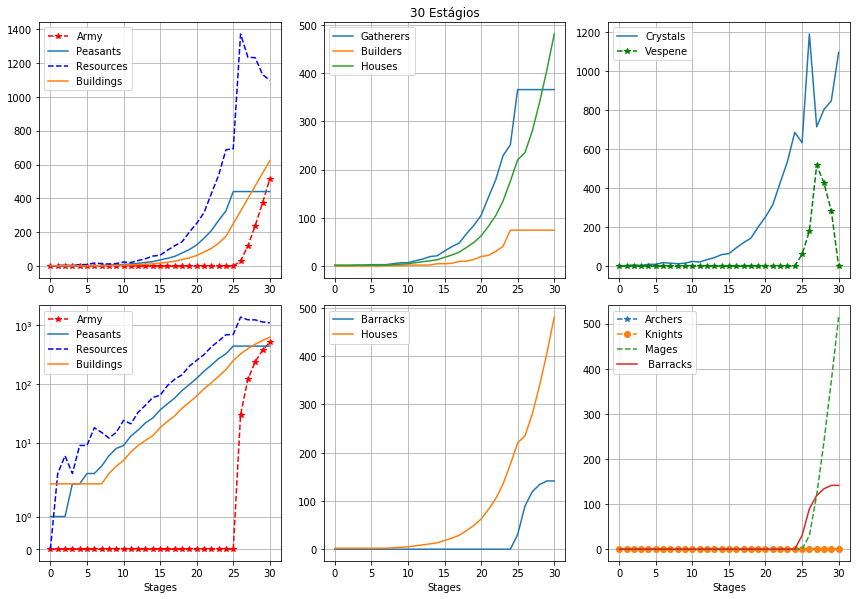

In [131]:
MSS_WoL_plot4(32, p, save=True, figname='mixedpunk30')